# Projekt 3

## Zad1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

try:
    df = pd.read_csv('data.csv')
    print("Dane wczytano")
except FileNotFoundError:
    print("Nie wczytano danych")

display(df.head())
print(df.info())
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nLiczba brakow po imputacji:")
print(df.isnull().sum().sum())

Dane wczytano


,Age,City_Tier,Education,Sector,Marital_Status,Dependents,Income,Rent,Groceries,Transport,Healthcare,Entertainment,Loan_Repayment,Savings_Goal,Potential_Savings
0,22,3,HS,Retail,Single,1,13770.50,3018.06,1730.99,966.41,792.45,1034.01,0.00,2391.27,6228.57
1,55,3,Bachelor,Manufacturing,Single,0,36753.63,10421.89,2567.12,3167.29,NaN,1873.98,4838.20,5529.53,12803.02
2,49,1,PhD,Healthcare,Married,2,69990.94,19913.46,8871.08,3554.88,1741.72,1863.42,0.00,11611.16,34046.38
3,39,1,HS,IT,Single,0,38720.32,9890.31,2186.69,1799.49,2139.95,1679.39,3167.76,5002.30,17856.73
4,38,2,HS,Healthcare,Single,4,30723.43,6653.45,3342.27,1302.85,1776.34,587.80,0.00,2879.97,17060.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                20000 non-null  int64  
 1   City_Tier          20000 non-null  int64  
 2   Education          19637 non-null  object 
 3   Sector             19600 non-null  object 
 4   Marital_Status     20000 non-null  object 
 5   Dependents         20000 non-null  int64  
 6   Income             20000 non-null  float64
 7   Rent               19593 non-null  float64
 8   Groceries          20000 non-null  float64
 9   Transport          20000 non-null  float64
 10  Healthcare         19609 non-null  float64
 11  Entertainment      20000 non-null  float64
 12  Loan_Repayment     19598 non-null  float64
 13  Savings_Goal       20000 non-null  float64
 14  Potential_Savings  20000 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 2.3+ MB
None

Liczba 

## Zad 2/3

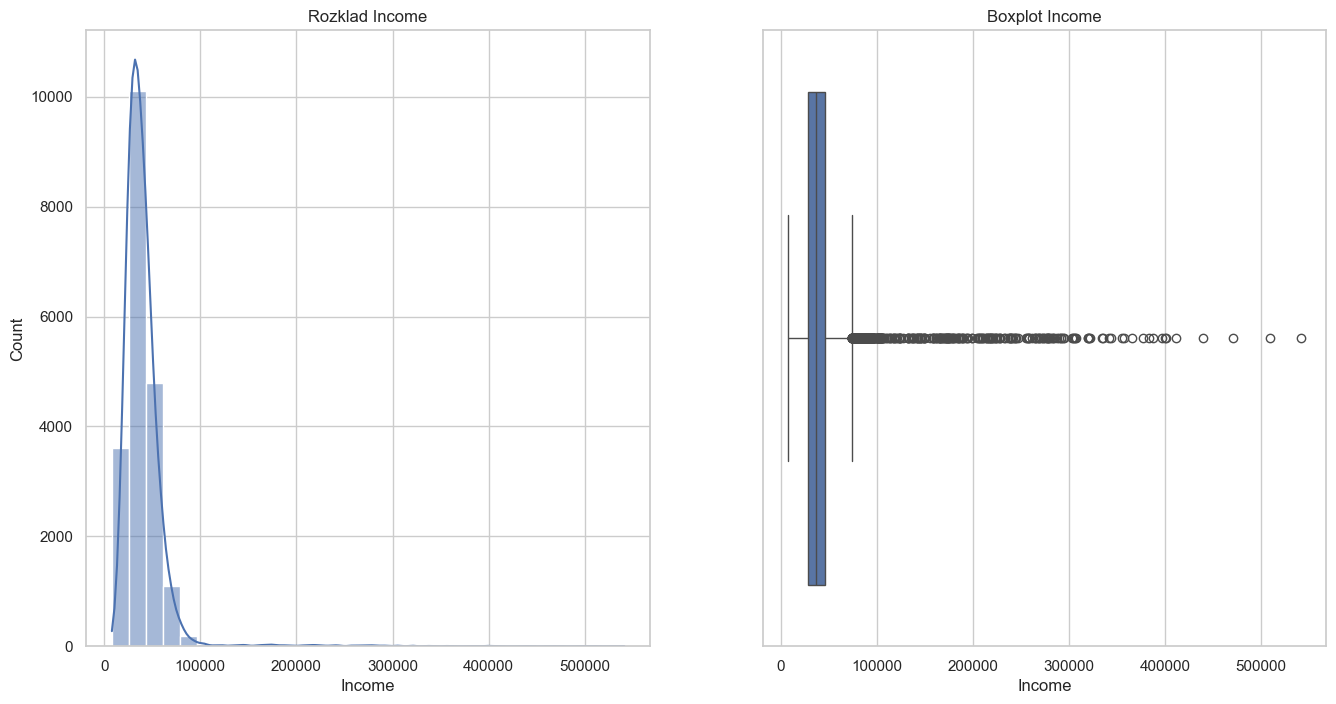

Dolna granica: 675.38
Gorna granica: 74162.47
Liczba outlinerow: 571

Statystyki Income (wszyscy):
count     20000.000000
mean      40016.681768
std       23782.207199
min        8000.000000
25%       28233.035000
50%       36391.145000
75%       46604.807500
max      541028.280000
Name: Income, dtype: float64

Statystyki Income (bez outlinerow):
count    19429.000000
mean     37428.704619
std      12666.071639
min       8000.000000
25%      28025.180000
50%      35973.510000
75%      45500.790000
max      74057.920000
Name: Income, dtype: float64


In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Rozklad Income')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'])
plt.title('Boxplot Income')
plt.show()

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Income_Outliner'] = np.where((df['Income'] < lower_bound) | (df['Income'] > upper_bound), 1, 0)

print(f"Dolna granica: {lower_bound:.2f}")
print(f"Gorna granica: {upper_bound:.2f}")
print(f"Liczba outlinerow: {df['Income_Outliner'].sum()}")
print("\nStatystyki Income (wszyscy):")
print(df['Income'].describe())
print("\nStatystyki Income (bez outlinerow):")
print(df[df['Income_Outliner'] == 0]['Income'].describe())

## Zad 4

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def prepare_data(data):
    data = data.copy()
    data = pd.get_dummies(data, drop_first=True)
    
    X = data.drop(['Income', 'Income_Outliner'], axis=1) 
    y = data['Income']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

print("przygotowano dane outlinery")
X_train_1, X_test_1, y_train_1, y_test_1 = prepare_data(df)

print("przygotowano dane bez outlinerow")
df_clean = df[df['Income_Outliner'] == 0].copy()
X_train_2, X_test_2, y_train_2, y_test_2 = prepare_data(df_clean)


przygotowano dane outlinery
przygotowano dane bez outlinerow


## Zad 5

--- Model 1: Z outlinerami ---
RMSE: 910.28
R2 Score: 0.9985


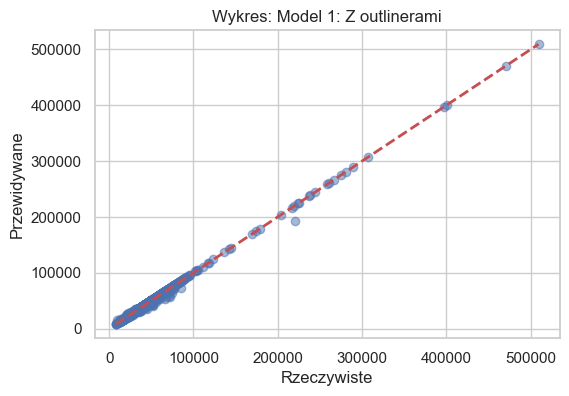

--- Model 2: Bez outlinerów ---
RMSE: 729.43
R2 Score: 0.9968


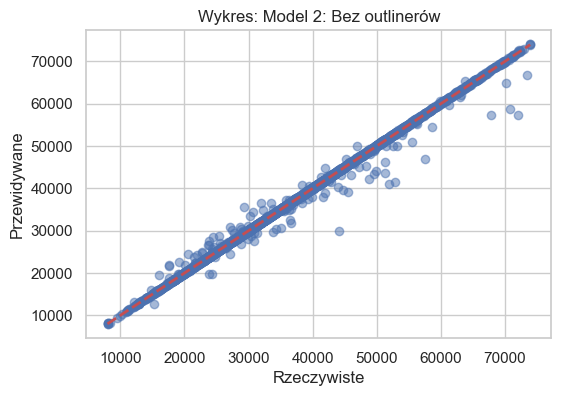

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(X_train, X_test, y_train, y_test, name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Rzeczywiste')
    plt.ylabel('Przewidywane')
    plt.title(f'Wykres: {name}')
    plt.show()

train_and_evaluate(X_train_1, X_test_1, y_train_1, y_test_1, "Model 1: Z outlinerami")
train_and_evaluate(X_train_2, X_test_2, y_train_2, y_test_2, "Model 2: Bez outlinerów")

## Porównanie

**1. Porównanie wyników modeli (RMSE i R2)**

| Metryka | Model 1 (Z outlinerami) | Model 2 (Bez outlinerów) | Komentarz |
| :--- | :--- | :--- | :--- |
| **RMSE**  | 910.28  | 729.34 | Niższy wynik = Lepszy model. Usunięcie odstających drastycznie zmniejsza błąd średniokwadratowy. |
| **R2** | 0.9985 | 0.9968 | Wyższy wynik = Lepszy model (bliżej 1.0). Model bez outlinerów znacznie lepiej wyjaśnia zmienność danych. |

## Wnioski

Jak wartości odstające wpływały na `Income` i jakość modelu?
Wartości odstające w kolumnie `Income` reprezentują osoby o skrajnie wysokich zarobkach, które znacznie odbiegają od reszty populacji.
*   **Wpływ na dane:** Powodują one silne skośnienie rozkładu i sztuczne zawyżenie średniej zarobków.
*   **Wpływ na model:** Regresja Liniowa (metoda najmniejszych kwadratów) jest bardzo wrażliwa na outliery. Algorytm za wszelką cenę próbuje zminimalizować błąd dla tych skrajnych punktów, co powoduje "przekrzywienie" całej linii regresji. W efekcie model traci precyzję dla typowych przypadków.

Który wariant obsługi odstających dał lepsze wyniki i dlaczego?
Zdecydowanie lepsze wyniki dał wariant z usunięciem wartości odstających.
*   **Dlaczego:** Po odfiltrowaniu anomalii, relacja między cechami demograficznymi a dochodem stała się stabilna i linowa. Model mógł poprawnie nauczyć się wzorców dla typowego pracownika, co zaowocowało drastycznym spadkiem błędu RMSE i wzrostem dopasowania R2. Usunięcie szumu pozwoliło ujawnić prawdziwy sygnał w danych.